<a href="https://colab.research.google.com/github/Daegil2/practice/blob/main/iris_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
#스케일러
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [50]:
train = pd.read_csv('/content/drive/MyDrive/corab/iris_practice/iris_train.csv')
test = pd.read_csv('/content/drive/MyDrive/corab/iris_practice/iris_test.csv')
submission= pd.read_csv('/content/drive/MyDrive/corab/iris_practice/submission.csv')

In [8]:
#데이터 모든 열을 출력하는 코드
pd.set_option('display.max_rows',None)

In [9]:
train.head()

,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,4.4,1.4,2.9,0.2
1,1,versicolor,6.4,4.5,3.2,1.5
2,2,virginica,6.2,4.8,2.8,1.8
3,3,virginica,7.2,6.1,3.6,2.5
4,4,setosa,4.9,1.4,3.0,0.2


In [10]:
test.head()

,id,species,sepal length (cm),petal length (cm)
0,0,setosa,5.4,1.7
1,1,setosa,5.7,1.5
2,2,setosa,5.3,1.5
3,3,setosa,5.1,1.9
4,4,virginica,6.0,4.8


In [11]:
train.isna().sum()

id                   0
species              0
sepal length (cm)    0
petal length (cm)    0
sepal width (cm)     0
petal width (cm)     0
dtype: int64

In [12]:
test.isna().sum()

id                   0
species              0
sepal length (cm)    0
petal length (cm)    0
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 75 non-null     int64  
 1   species            75 non-null     object 
 2   sepal length (cm)  75 non-null     float64
 3   petal length (cm)  75 non-null     float64
 4   sepal width (cm)   75 non-null     float64
 5   petal width (cm)   75 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 75 non-null     int64  
 1   species            75 non-null     object 
 2   sepal length (cm)  75 non-null     float64
 3   petal length (cm)  75 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


In [15]:
# 학습에 사용할 컬럼과 타겟 컬럼을 선정
features = ['species', 'sepal length (cm)','petal length (cm)']
target = ['sepal width (cm)', 'petal width (cm)' ]

In [16]:
X_train, X_test, y_train = train[features],test[features], train[target]

In [17]:
# 품종을 label화, 품종간의 영향을 없애기 위해 one-hot encoding 방식을 채택
X_train = pd.get_dummies(data = X_train, columns = ['species'], prefix = 'species')
X_test = pd.get_dummies(data = X_test, columns = ['species'], prefix = 'species')

In [18]:
X_train.head()

,sepal length (cm),petal length (cm),species_setosa,species_versicolor,species_virginica
0,4.4,1.4,1,0,0
1,6.4,4.5,0,1,0
2,6.2,4.8,0,0,1
3,7.2,6.1,0,0,1
4,4.9,1.4,1,0,0


In [22]:
#그래프에서 한글 꺠짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_

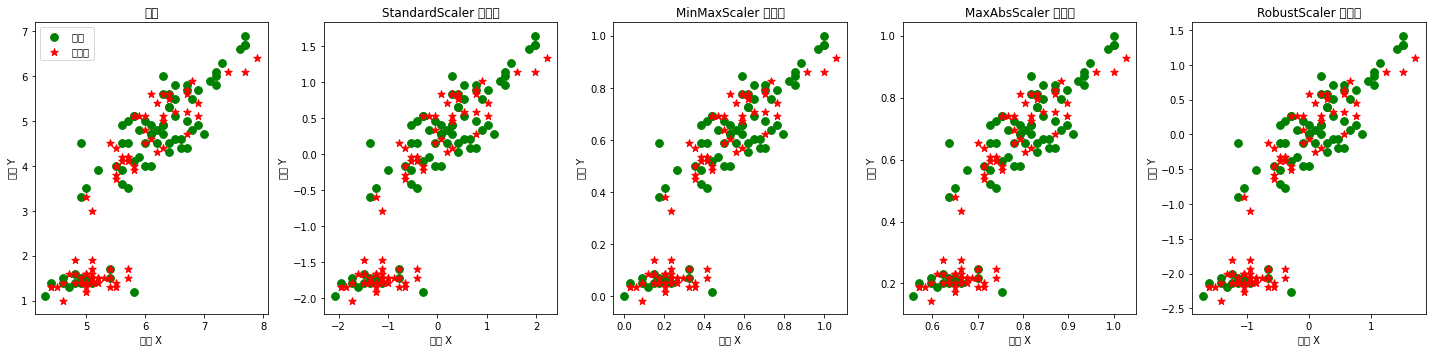

In [26]:
# 스케일러 선택을 위한 코드

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].scatter(X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1],
                c= 'green', label="훈련 ", s=60)
axes[0].scatter(X_test.to_numpy()[:, 0], X_test.to_numpy()[:, 1], marker='*',
                c= 'red', label="테스트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본")


# StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled1 = scaler.transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

axes[1].scatter(X_train_scaled1[:, 0], X_train_scaled1[:, 1],
                c= 'green', label="훈련", s=60)
axes[1].scatter(X_test_scaled1[:, 0], X_test_scaled1[:, 1], marker='*',
                c='red', label="테스트", s=60)
axes[1].set_title("StandardScaler 데이터")


# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled2 = scaler.transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

axes[2].scatter(X_train_scaled2[:, 0], X_train_scaled2[:, 1],
                c= 'green', label="훈련 세트", s=60)
axes[2].scatter(X_test_scaled2[:, 0], X_test_scaled2[:, 1], marker='*',
                c='red', label="테스트 세트", s=60)
axes[2].set_title("MinMaxScaler 데이터")



# MaxAbsScaler 
scaler = MaxAbsScaler()
scaler.fit(X_train)
X_train_scaled3 = scaler.transform(X_train)
X_test_scaled3 = scaler.transform(X_test)

axes[3].scatter(X_train_scaled3[:, 0], X_train_scaled3[:, 1],
                c= 'green', label="훈련 세트", s=60)
axes[3].scatter(X_test_scaled3[:, 0], X_test_scaled3[:, 1], marker='*',
                c='red', label="테스트 세트", s=60)
axes[3].set_title("MaxAbsScaler 데이터")



# RobustScaler 
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled4 = scaler.transform(X_train)
X_test_scaled4 = scaler.transform(X_test)

axes[4].scatter(X_train_scaled4[:, 0], X_train_scaled4[:, 1],
                c= 'green', label="훈련 세트", s=60)
axes[4].scatter(X_test_scaled4[:, 0], X_test_scaled4[:, 1], marker='*',
                c='red', label="테스트 세트", s=60)
axes[4].set_title("RobustScaler 데이터")



for ax in axes:
    ax.set_xlabel("특성 X")
    ax.set_ylabel("특성 Y")
fig.tight_layout()

In [37]:
# 딥러닝 모델

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [44]:
# 딥러닝 모델


def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mse'])
    
    return model

3/3 [==============================] - 0s 5ms/step - loss: 0.0674 - mse: 0.0674
Epoch 1/20000
4/4 - 1s - loss: 8.9416 - mse: 8.9416 - val_loss: 8.7379 - val_mse: 8.7379
Epoch 2/20000
4/4 - 0s - loss: 8.8205 - mse: 8.8205 - val_loss: 8.6541 - val_mse: 8.6541
Epoch 3/20000
4/4 - 0s - loss: 8.7340 - mse: 8.7340 - val_loss: 8.5689 - val_mse: 8.5689
Epoch 4/20000
4/4 - 0s - loss: 8.6361 - mse: 8.6361 - val_loss: 8.4688 - val_mse: 8.4688
Epoch 5/20000
4/4 - 0s - loss: 8.5288 - mse: 8.5288 - val_loss: 8.3508 - val_mse: 8.3508
Epoch 6/20000
4/4 - 0s - loss: 8.3965 - mse: 8.3965 - val_loss: 8.2088 - val_mse: 8.2088
Epoch 7/20000
4/4 - 0s - loss: 8.2379 - mse: 8.2379 - val_loss: 8.0180 - val_mse: 8.0180
Epoch 8/20000
4/4 - 0s - loss: 8.0015 - mse: 8.0015 - val_loss: 7.7855 - val_mse: 7.7855
Epoch 9/20000
4/4 - 0s - loss: 7.7212 - mse: 7.7212 - val_loss: 7.5011 - val_mse: 7.5011
Epoch 10/20000
4/4 - 0s - loss: 7.3755 - mse: 7.3755 - val_loss: 7.1422 - val_mse: 7.1422
Epoch 11/20000
4/4 - 0s - los

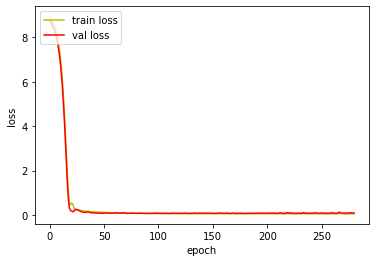

In [45]:
# 1.sepal width 예측

model.evaluate(X_train_scaled1, y_train['sepal width (cm)'])
# early stopping 을 사용하여 과대적합 방지
early_stopping = EarlyStopping(monitor='val_loss',  patience=100)
""" monitor : 관찰하고자 하는 항목입니다. ‘val_loss’나 ‘val_acc’가 주로 사용됩니다.
min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단합니다.
patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정합니다. 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습일 종료합니다.
verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정합니다. (0, 1, 2)
mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정합니다. 예를 들어 관찰 항목이 ‘val_loss’인 경우에는 감소되는 것이 멈출 때 종료되어야 하므로, ‘min’으로 설정됩니다.
auto : 관찰하는 이름에 따라 자동으로 지정합니다."""

model = build_model(num_input=5)
history = model.fit(X_train_scaled1, y_train['sepal width (cm)'], batch_size=15, epochs=20000, validation_split=0.35, verbose=2,callbacks=[early_stopping])


%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

In [51]:
lrIris = submission.copy()
lrIris['sepal width (cm)']=model.predict(X_test_scaled1)

Epoch 1/20000
4/4 - 1s - loss: 8.8213 - mse: 8.8213 - val_loss: 8.4749 - val_mse: 8.4749
Epoch 2/20000
4/4 - 0s - loss: 8.4346 - mse: 8.4346 - val_loss: 8.1570 - val_mse: 8.1570
Epoch 3/20000
4/4 - 0s - loss: 8.0613 - mse: 8.0613 - val_loss: 7.8043 - val_mse: 7.8043
Epoch 4/20000
4/4 - 0s - loss: 7.6512 - mse: 7.6512 - val_loss: 7.3971 - val_mse: 7.3971
Epoch 5/20000
4/4 - 0s - loss: 7.1820 - mse: 7.1820 - val_loss: 6.9026 - val_mse: 6.9026
Epoch 6/20000
4/4 - 0s - loss: 6.5967 - mse: 6.5967 - val_loss: 6.3063 - val_mse: 6.3063
Epoch 7/20000
4/4 - 0s - loss: 5.9170 - mse: 5.9170 - val_loss: 5.6054 - val_mse: 5.6054
Epoch 8/20000
4/4 - 0s - loss: 5.1172 - mse: 5.1172 - val_loss: 4.7903 - val_mse: 4.7903
Epoch 9/20000
4/4 - 0s - loss: 4.2013 - mse: 4.2013 - val_loss: 3.8660 - val_mse: 3.8660
Epoch 10/20000
4/4 - 0s - loss: 3.1938 - mse: 3.1938 - val_loss: 2.8648 - val_mse: 2.8648
Epoch 11/20000
4/4 - 0s - loss: 2.1922 - mse: 2.1922 - val_loss: 1.8580 - val_mse: 1.8580
Epoch 12/20000
4/4 

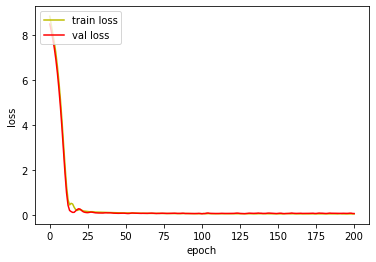

In [46]:
# 2.petal width 예측
model = build_model(num_input=5)
history = model.fit(X_train_scaled1, y_train['sepal width (cm)'], batch_size=15, epochs=20000, validation_split=0.35, verbose=2,callbacks=[early_stopping])

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()


In [52]:
lrIris['petal width (cm)']=model.predict(X_test_scaled1)

In [54]:
lrIris.to_csv('submission2.csv',index=False)

In [56]:
lrIris

,id,sepal width (cm),petal width (cm)
0,0,3.664457,3.664457
1,1,3.974596,3.974596
2,2,3.667922,3.667922
3,3,3.283603,3.283603
4,4,2.654394,2.654394
5,5,2.623520,2.623520
6,6,3.758481,3.758481
7,7,3.426926,3.426926
8,8,3.283388,3.283388
9,9,2.917459,2.917459
